# Este projeto tem o intuito de trabalhar com os seguintes desafios

- modelagem estatística para entender quais são os principais fatores e em que proporção infligem no preço do leite.
- Projeção para o ano de 2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Testes estatisticos
from scipy.stats import mannwhitneyu   # Comparar duas amostras independentes

from scipy.stats import levene  #verificar se duas ou mais amostras possuem variancias iguais


import warnings
warnings.filterwarnings('ignore')

In [126]:
caminho = r"C:\Users\eduar\OneDrive\Documentos\SandoBox\Projetos\PriceCast\Dataset\dados_milk.xlsx"
dados = pd.read_excel(caminho)

# Padroniza as colunas
dados.columns = [col.strip().lower().replace(" ", "_") for col in dados.columns]

In [127]:
dados.columns

Index(['mês', 'produção_de_leite_(milhões/l)', 'importações_(milhões/l)',
       'exportações_(milhões/l)', 'oferta_total_(milhões_de_litros)',
       'população_(milhões_de_pessoas)', 'oferta_per_capita_(litros/mês)',
       'taxa_de_desemprego_%)', 'massa_salarial_(mihões_de_reais)',
       'leite_uht_indústria_(r$/litro)', 'leite_uht_supermercado_(r$/litro)',
       'preço_do_leite_ao_produtor_(r$/litro)'],
      dtype='object')

In [128]:
dados.rename(columns={
    "mês": "data",
    "produção_de_leite_(milhões/l)": "producao_leite",
    "importações_(milhões/l)": "importacoes",
    "exportações_(milhões/l)": "exportacoes",
    "oferta_total_(milhões_de_litros)": "oferta_total",
    "população_(milhões_de_pessoas)": "populacao_pessoas",
    "oferta_per_capita_(litros/mês)": "oferta_per_capita",
    "taxa_de_desemprego_%)": "taxa_desemprego",
    "massa_salarial_(mihões_de_reais)": "massa_salarial",
    "leite_uht_indústria_(r$/litro)": "leite_uht_industria",
    "leite_uht_supermercado_(r$/litro)": "leite_uht_supermercado",
    "preço_do_leite_ao_produtor_(r$/litro)": "preco_leite_produtor"
}, inplace=True)

dados.head(5)

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor
0,2007-01-01,1629.549,51.486829,37.232129,1643.803700,188.496928,8.720586,NaN,NaN,NaN,1.422492,0.450872
1,2007-02-01,1405.073,44.565910,39.461382,1410.177528,188.657245,7.474812,NaN,NaN,NaN,1.412007,0.480057
2,2007-03-01,1444.693,23.326896,40.938828,1427.081068,188.817561,7.557989,NaN,NaN,NaN,1.427207,0.500857
3,2007-04-01,1333.077,19.810018,33.958065,1318.928953,188.977878,6.979277,NaN,NaN,NaN,1.471410,0.544433
4,2007-05-01,1359.253,16.034976,45.073625,1330.214351,189.138194,7.033029,NaN,NaN,NaN,1.613760,0.586239


In [129]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data                    228 non-null    datetime64[ns]
 1   producao_leite          228 non-null    float64       
 2   importacoes             228 non-null    float64       
 3   exportacoes             228 non-null    float64       
 4   oferta_total            228 non-null    float64       
 5   populacao_pessoas       228 non-null    float64       
 6   oferta_per_capita       228 non-null    float64       
 7   taxa_desemprego         154 non-null    float64       
 8   massa_salarial          154 non-null    float64       
 9   leite_uht_industria     127 non-null    float64       
 10  leite_uht_supermercado  218 non-null    float64       
 11  preco_leite_produtor    216 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 21

In [130]:
# Extracao do ano e do mes
dados['ano'] = dados['data'].dt.year
dados['mes'] = dados['data'].dt.month

In [131]:
dados.head(3)

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes
0,2007-01-01,1629.549,51.486829,37.232129,1643.803700,188.496928,8.720586,NaN,NaN,NaN,1.422492,0.450872,2007,1
1,2007-02-01,1405.073,44.565910,39.461382,1410.177528,188.657245,7.474812,NaN,NaN,NaN,1.412007,0.480057,2007,2
2,2007-03-01,1444.693,23.326896,40.938828,1427.081068,188.817561,7.557989,NaN,NaN,NaN,1.427207,0.500857,2007,3


**OBS**

Como a ideia do projeto é fazer a projeção para a variável dependente "preco_leite_produtor", iremos remover os registros de 2025, e iremos usar eles somente na hora do deploy

In [132]:
dados_2025 = dados[dados['ano'] == 2025]
dados = dados[dados['ano'] != 2025]

Taxa de valores nulos do conjunto de dados

In [133]:
taxa_nulos = dados.isnull().sum()/len(dados)
taxa_nulos

data                      0.000000
producao_leite            0.000000
importacoes               0.000000
exportacoes               0.000000
oferta_total              0.000000
populacao_pessoas         0.000000
oferta_per_capita         0.000000
taxa_desemprego           0.287037
massa_salarial            0.287037
leite_uht_industria       0.421296
leite_uht_supermercado    0.000000
preco_leite_produtor      0.000000
ano                       0.000000
mes                       0.000000
dtype: float64

In [134]:
dados.describe()

,data,producao_leite,importacoes,exportacoes,oferta_total,populacao_pessoas,oferta_per_capita,taxa_desemprego,massa_salarial,leite_uht_industria,leite_uht_supermercado,preco_leite_produtor,ano,mes
count,216,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,154.000000,154.000000,125.000000,216.000000,216.000000,216.000000,216.000000
mean,2015-12-16 10:53:20,1924.353731,97.173912,21.106277,2000.421367,202.319681,9.861063,0.100455,208397.935065,2.968820,2.989757,1.319536,2015.500000,6.500000
min,2007-01-01 00:00:00,1324.948000,10.188356,2.414308,1306.775293,188.496928,6.903252,0.061000,121994.000000,1.568627,1.412007,0.450872,2007.000000,1.000000
25%,2011-06-23 12:00:00,1767.601000,61.638890,7.031172,1830.724531,196.129250,9.245598,0.075250,165000.750000,2.191693,2.215812,0.781050,2011.000000,3.750000
50%,2015-12-16 12:00:00,1958.527000,84.780280,10.727576,2033.045700,203.076605,9.950747,0.094500,198723.000000,2.729022,2.777894,1.013578,2015.500000,6.500000
75%,2020-06-08 12:00:00,2100.720250,133.284569,26.528047,2196.108137,209.085840,10.689359,0.123000,236621.500000,3.600700,3.620236,1.802575,2020.000000,9.250000
max,2024-12-01 00:00:00,2348.481000,244.038934,112.347610,2517.040863,212.932620,12.003825,0.149000,351063.000000,6.447781,6.349700,3.570700,2024.000000,12.000000
std,NaN,223.105693,53.035743,23.113584,267.272151,7.235492,1.075320,0.026648,58453.308737,0.976901,1.078435,0.711069,5.200179,3.460071


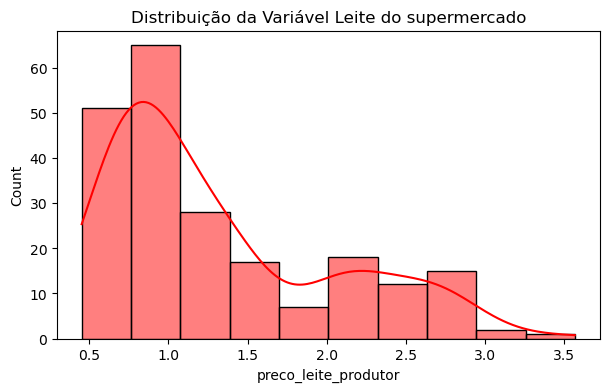

In [135]:
plt.figure(figsize= (7, 4))
sns.histplot(data = dados, x = dados.preco_leite_produtor, kde = True, color = 'red')
plt.title('Distribuição da Variável Leite do supermercado')
plt.show()

**Análise**

- A variável dependente está assimetrica a direita, ou seja, esta distorcida. Pode ser causa por valores discrepantes (outliers). 
- Avaliaremos a assimetria utilizando skewness



In [136]:
assimetria = dados.drop(['data', 'ano', 'mes'], axis =1)
assimetria.skew(axis = 0)

producao_leite           -0.533668
importacoes               0.587029
exportacoes               2.104615
oferta_total             -0.578344
populacao_pessoas        -0.242711
oferta_per_capita        -0.577604
taxa_desemprego           0.171854
massa_salarial            0.695731
leite_uht_industria       0.803625
leite_uht_supermercado    0.920751
preco_leite_produtor      0.992780
dtype: float64

Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. Um valor entre 0,5 e 1 ou -0,5 e -1 é moderadamente distorcido. Um valor entre -0,5 e 0,5 indica que a distribuição é bastante. simétrica. No nosso caso, a variável esta moderadamente distorcida. Então iremos aplicar uma técnica de logaritmo para diminuir essa distorção

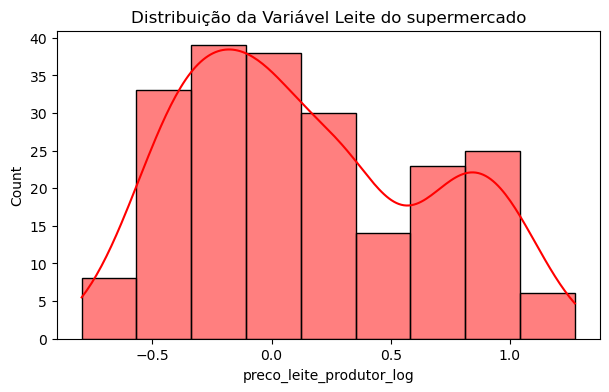

producao_leite             -0.533668
importacoes                 0.587029
exportacoes                 2.104615
oferta_total               -0.578344
populacao_pessoas          -0.242711
oferta_per_capita          -0.577604
taxa_desemprego             0.171854
massa_salarial              0.695731
leite_uht_industria         0.803625
leite_uht_supermercado      0.920751
preco_leite_produtor        0.992780
preco_leite_produtor_log    0.378242
dtype: float64

In [137]:
# Transformação de log
dados['preco_leite_produtor_log'] = np.log(dados['preco_leite_produtor'])

plt.figure(figsize= (7, 4))
sns.histplot(data = dados, x = dados.preco_leite_produtor_log, kde = True, color = 'red')
plt.title('Distribuição da Variável Leite do supermercado')
plt.show()

# Verificando assimetria da variavel novamente
assimetria = dados.drop(['data', 'ano', 'mes'], axis =1)
assimetria.skew(axis = 0)


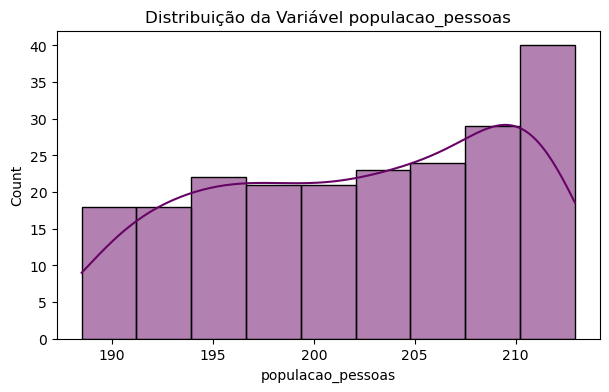

In [138]:
plt.figure(figsize= (7, 4))
sns.histplot(data = dados, x = dados.populacao_pessoas, kde = True, color = '#660465')
plt.title('Distribuição da Variável populacao_pessoas')
plt.show()

Análise

- É possível notar o aumento da populacao de pessoas, pode-se inferir que o consumo de leite também aumente. Nesse sentido, espera-se um aumento no valor do leite do supermercado

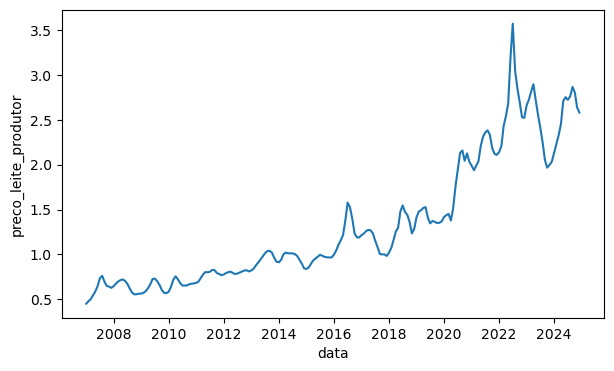

In [139]:
plt.figure(figsize= (7, 4))
sns.lineplot(data = dados, x = dados['data'], y = dados['preco_leite_produtor'])
plt.show()

Análise

- Com base no gráfico acima, pode-se visualizar uma tendência de crescimento ao passar do tempo. Isso se deve do aumento da população de pessoas

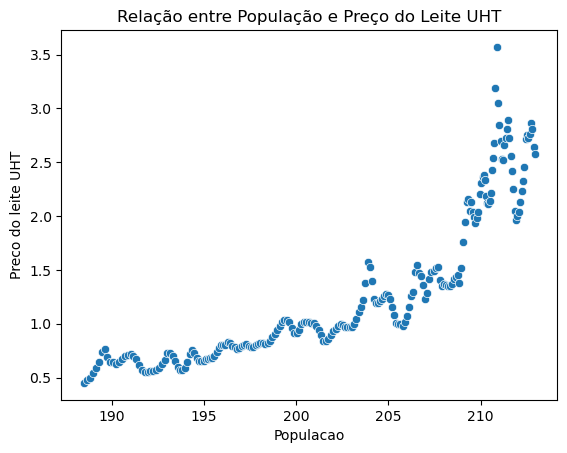

In [140]:
# Vizualiando a dispersao entre essas duas variáveis
sns.scatterplot(data = dados, x = 'populacao_pessoas', y = 'preco_leite_produtor')
plt.title('Relação entre População e Preço do Leite UHT')
plt.xlabel('Populacao')
plt.ylabel('Preco do leite UHT')
plt.show()

Aplicaremos a correlação de Pearson para verificar se há uma correlação linear entre essas duas variáveis


In [141]:
corr = dados['populacao_pessoas'].corr(dados['preco_leite_produtor'])
print(f"Correlação de Pearson: {corr:.2f}")

Correlação de Pearson: 0.87


Valores mais proxímos de 1 indicam forte correlação positiva. No nosso caso, uma correlação de 0.87 é considerata fortemente positiva. Ou seja, existe uma forte relação entre a variáveil preco_leite_produtor e populacao de pessoas.

### Existe diferença significativa no preco do leite do supermercado e o preco do leite ao produto?

- Para isso iremos ver a dispersao entre essas duas variáveis

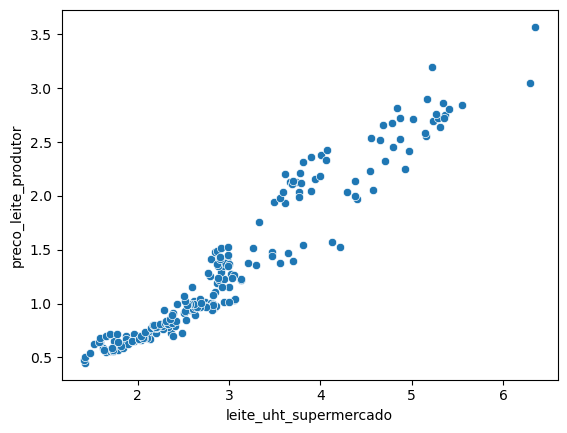

Correlação de Pearson: 0.97


In [149]:
sns.scatterplot(data = dados, x = 'leite_uht_supermercado', y = 'preco_leite_produtor')
plt.show()

corr = dados['leite_uht_supermercado'].corr(dados['preco_leite_produtor'])
print(f"Correlação de Pearson: {corr:.2f}")

Análise

- Podemos ver que ambas estão em crescimento juntas, quando uma cresce a outra também tende a crescer. E a correlação entre elas é fortemente positiva com um valor de 0.97, em outras palavras elas aumetam e diminuem proporcionalmente.

### Teste de Mann-Whitney U

O teste de Mann-Whitney é um teste estatístico não paramétrico utilizado para comparar duas amostras independentes. Ele verifica se há uma diferença estatisticamente significativa nas distribuições das duas amostras. Ele é usado quando os dados não seguem uma distribuição normal (o que já foi verificado, mesmo transformando os dados, a variavel ainda sim, continua nao seguindo uma distribuicao normal).

Hipóteses do teste

- Hipótese nula (H₀): As duas amostras vêm da mesma distribuição (não há diferença significativa).
- Hipótese alternativa (H₁): As amostras vêm de distribuições diferentes (há diferença significativa).

In [ ]:
grupo_supermercado = dados['leite_uht_supermercado']
grupo_produtor = dados['preco_leite_produtor']


stat, p = mannwhitneyu(grupo_supermercado, grupo_produtor, alternative='two-sided')

print(f"Estatística U = {stat:.4f}")
print(f"p-valor = {p:.6f}")

# Interpretação
if p < 0.05:
    print("Há diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos.")

Estatística U = 42528.0000
p-valor = 0.000000
Há diferença estatisticamente significativa entre os grupos.


### Teste de Levene (para variâncias homogêneas)

Esse teste verifica se as variâncias das amostras são iguais (homocedasticidade).Útil também quando os dados não seguem uma distribuição normal, o que já foi verificado. 

- Se o p-valor for menor que o nível de significância (alpha): Rejeitamos a **hipótese nula** e concluímos que as variâncias não são homogêneas (pelo menos uma variância é diferentes)
- Se o p-valor for maior que α: **Não** rejeitamos a hipótese nula e concluímos que as variâncias são homogêneas (são iguais)

In [ ]:
# Teste de Levene para igualdade de variâncias
stat, p = levene(
    dados['leite_uht_supermercado'],
    dados['preco_leite_produtor']
)

print(f"Estatística de Levene: {stat:.4f}, P-valor: {p:.4f}")

# Interpretação
if p < 0.05:
    print("Há diferença estatisticamente significativa nas variâncias das duas amostras.")
else:
    print("Não há diferença estatisticamente significativa nas variâncias das duas amostras.")


Estatística de Levene: 19.2054, P-valor: 0.0000
Há diferença estatisticamente significativa nas variâncias das duas amostras.


Analise

Como o valor p foi muito baixo nos dois testes, podemos concluir que:

- Provavelmente existe diferença estatisticamente significativa entre os precos do leite no supermercado e no produtor
- Eventualmente as distribuições dos precos são diferentes, verificado atráves do teste de Mann-Whitney U
- Muito provavelmente as variâncias também são diferentes, verificado atráves do teste de Levene.

Ainda sim, as variáveis apresentam uma alta correlação positiva, sugereindo que seguem uma tendência similar, mas com valores e dispersões distintas.

### O valor das importacoes e exportacoes está aumentando ao passar do tempo?

- Importação é o processo de trazer produtos ou serviços de um país estrageiro para o para o país de destino. O objetivo é adquirir itens que não são produzidos localmente ou que são mais baratos ou de melhor qualidade em outros mercados

- A exportação é o processo de enviar produtos ou serviços de um país para outro, geralmente com o objetivo de vender para mercados internacionais.

In [159]:
importacao_agrupado = dados.groupby('ano')['importacoes'].sum().reset_index(name = 'soma')
exportacoes_agrupado = dados.groupby('ano')['exportacoes'].sum().reset_index(name = 'soma')

# Arredondando os valores
importacao_agrupado['soma'] = importacao_agrupado['soma'].round(2)
exportacoes_agrupado['soma'] = exportacoes_agrupado['soma'].round(2)

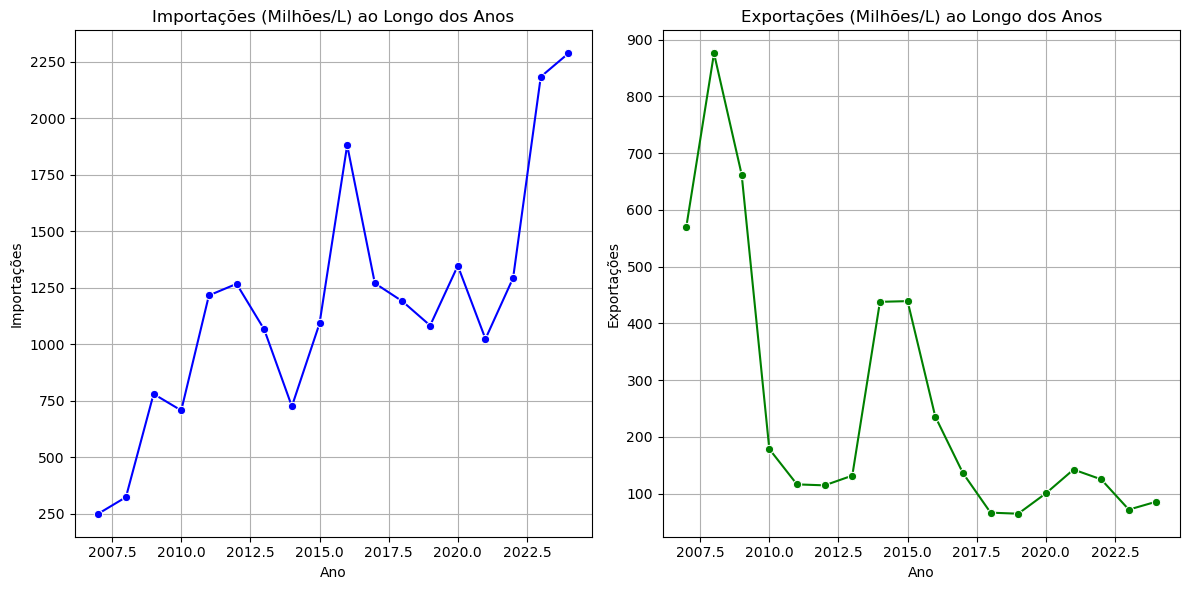

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(data=importacao_agrupado, x='ano', y='soma', ax=ax1, marker='o', color='blue')
ax1.set_title('Importações (Milhões/L) ao Longo dos Anos')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Importações')
ax1.grid(True)

# Gráfico de exportações com Seaborn
sns.lineplot(data=exportacoes_agrupado, x='ano', y='soma', ax=ax2, marker='o', color='green')
ax2.set_title('Exportações (Milhões/L) ao Longo dos Anos')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Exportações')
ax2.grid(True)

plt.tight_layout()
plt.show()

Analise

É possível observar que a empresa está importando mais produtos de mercados estrangeiros do que exportando para esses mesmos locais. Isso fica evidente com a queda registrada um pouco depois de 2007, ano em que as importações começaram a aumentar de forma contínua ao longo do tempo. Ou seja existe um gasto maior comprando do que obtendo lucro vendendo.